In [21]:
import json
import matplotlib.pyplot as plt
from evaluation import parse_label
import numpy as np 

def draw_comparatives(category_name, base_pth, turns, budget, config, data_name):
    base_pth = base_pth.format(category_name)
    metric_pth = base_pth+"_metrics"
    greedy_prob_pth = base_pth + f"_prob_greedy_{turns}_{budget}"
    random_prob_pth = base_pth +f"_prob_random_{turns}_{budget}"
    with open(greedy_prob_pth, "r") as f:
        c_list = json.load(f)
    with open(random_prob_pth, "r") as fg:
        c_list2 = json.load(fg)
    greedy_info_path = base_pth + f"_info_greedy_{turns}_{budget}"
    
    with open(greedy_info_path, "r") as f:
        info_dic = json.load(f)
    ans = info_dic["ans"]
    prob = max(c_list)
    index_n = c_list.index(prob)
    with open(base_pth.format(category_name), "r") as f:
        match_results = json.load(f)
    temp_select_result = match_results[index_n]
    for ans_pair in ans:
        if ans_pair[0] in temp_select_result and ans_pair[1]=='no':
            temp_select_result.remove(ans_pair[0])
            print("remove", ans_pair[0])
        if ans_pair[0] not in temp_select_result and ans_pair[1]=='yes':
            temp_select_result.append(ans_pair[0])
            print("add",ans_pair[0]) 
    info_dic["select_result"] = temp_select_result
    label_path = config[data_name]["ground_truth_path"].format(category_name, category_name.lower())
    label_list = parse_label(label_path)
    label_len = len(label_list)
    
    inter_set = []
    for i in label_list:
        if list(i) in temp_select_result:
            inter_set.append(i)
    acc_length = len(inter_set)
    predict_len = len(temp_select_result)
    precision = acc_length/float(predict_len)
    recall = acc_length/float(label_len)
    if acc_length==0:
        f1 = 0
    else:
        f1 = 2*(precision*recall)/(precision+recall)
    info_dic["metrics"] = {"precision":precision, "recall":recall,"f1":f1, "labels":str(label_list)}
    
    with open(metric_pth, "r") as f:
        metric_dic = json.load(f)
    info_dic["best_f1"] = max([metric_dic[str(idx)]["f1"] for idx in range(len(c_list))])
    with open(greedy_info_path, "w") as f:
        json.dump(info_dic,f,ensure_ascii=False, indent=2)
    
    
   
    greedy_f1_prob = []
    random_f1_prob = []
    for id_p, prob in enumerate(c_list2):
        random_f1_prob.append((metric_dic[str(id_p)]['f1'], prob))
    for id_p, prob in enumerate(c_list):
        greedy_f1_prob.append((metric_dic[str(id_p)]['f1'], prob))
    o1 = sorted(greedy_f1_prob, key=lambda r:r[1], reverse=True)
    o2 = sorted(greedy_f1_prob, key=lambda r:r[0], reverse=True)
    o3 = sorted(random_f1_prob, key=lambda r:r[1], reverse=True)
    o4 = sorted(random_f1_prob, key=lambda r:r[0], reverse=True)
    random_mrr = [o3.index(o4[0])+1, o3.index(o4[1])+1, o3.index(o4[2])+1, o3.index(o4[3])+1]
    greedy_mrr = [o1.index(o2[0])+1, o1.index(o2[1])+1, o1.index(o2[2])+1, o1.index(o2[3])+1]
    return o1,o2,o3,o4, greedy_mrr, random_mrr

In [25]:
import matplotlib.pyplot as plt
from evaluation import caculate_metric
import yaml
plt.rcParams['font.size']=12

def mrr_pdf(config, data_name):
    fig = plt.figure(1, figsize=(24,5))
    names = config[data_name]["names"]
    base_pth = config[data_name]["path"]
    ground_truth_path = config[data_name]["ground_truth_path"]
    budgets = config[data_name]["budgets"]
    turns = config[data_name]["turns"]
    
    for name in names:
        caculate_metric(base_pth.format(name), ground_truth_path.format(name, name.lower()))
    
    ax1 = fig.add_subplot(141)
    ax2 = fig.add_subplot(142)
    ax3 = fig.add_subplot(143)
    ax4 = fig.add_subplot(144)
    ax_l = [ax1, ax2, ax3, ax4]

    lines_m = []
    for id_ax, i in enumerate(names):
        turns_list = [i+1 for i in range(turns[id_ax])]
        y_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
        random_y = []
        greedy_y = []
        for turn in range(turns[id_ax]):
            op, op2,op3, op4,g_mrr,r_mrr = draw_comparatives(i, base_pth, turn+1, budgets[id_ax], config, data_name)
            random_y.append(1/r_mrr[0])
            greedy_y.append(1/g_mrr[0])
        lines_m.append(ax_l[id_ax].plot(turns_list, random_y, color='b',linestyle='-', marker='o', label="random"))
        lines_m.append(ax_l[id_ax].plot(turns_list, greedy_y, color='r', linestyle='-', marker='o', label="greedy"))
        ax_l[id_ax].set_title(i+" budget={}".format(budgets[id_ax]))
        ax_l[id_ax].set_xticks(turns_list)
        ax_l[id_ax].set_yticks(y_list)
    # 显示图例
    lines, labels = ax_l[-2].get_legend_handles_labels()
    fig.legend(lines,labels,loc="upper center")
    plt.savefig(f"./result_pdfs/{data_name}_mrr.pdf")
    # 显示图表
    plt.show()
    plt.close()


remove ['motherLabel', 'fatherName']
add ['genderLabel', 'genderType']
remove ['motherLabel', 'motherName']
add ['genderLabel', 'genderType']
remove ['motherLabel', 'motherName']
add ['genderLabel', 'genderType']
remove ['motherLabel', 'motherName']
add ['genderLabel', 'genderType']
add ['geniusNameLabel', 'musicianName']
remove ['motherLabel', 'motherName']
add ['genderLabel', 'genderType']
add ['geniusNameLabel', 'musicianName']
remove ['motherLabel', 'motherName']
add ['genderLabel', 'genderType']
add ['geniusNameLabel', 'musicianName']
add ['genderLabel', 'genderType']
add ['genderLabel', 'genderType']
remove ['motherLabel', 'motherName']
add ['genderLabel', 'genderType']
add ['musicianLabel', 'geniusNameLabel']
remove ['motherLabel', 'motherName']
add ['genderLabel', 'genderType']
add ['musicianLabel', 'geniusNameLabel']
remove ['motherLabel', 'motherName']
add ['genderLabel', 'genderType']
add ['musicianLabel', 'geniusNameLabel']
remove ['motherLabel', 'motherName']
add ['genderL

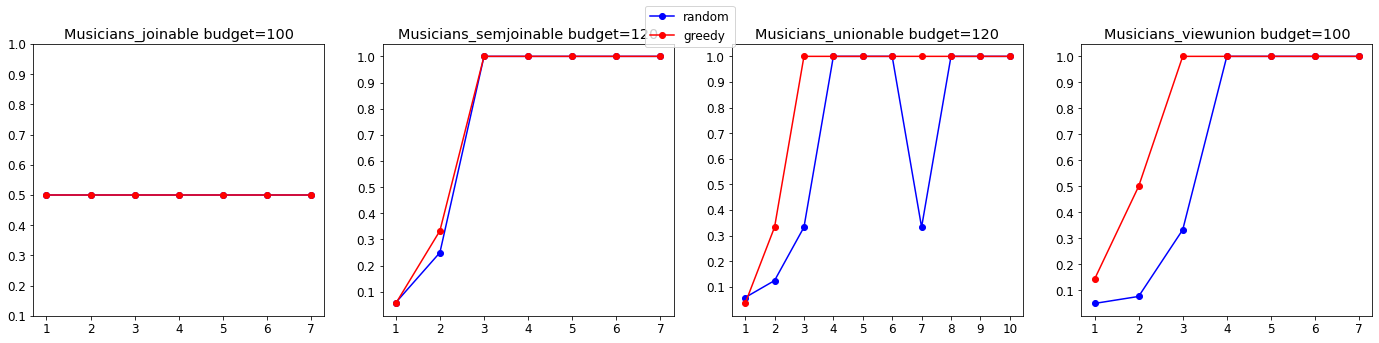

add ['assay_category', 'assays_assay_cell_type']
add ['assay_id', 'assays_src_assay_id']
add ['assay_category', 'assays_assay_cell_type']
add ['assay_id', 'assays_src_assay_id']
add ['src_assay_id', 'assays_assay_id']
add ['curated_by', 'assays_curated_by']
remove ['tissue_id', 'assays_tss_d']
remove ['tissue_id', 'assays_tss_d']
add ['assay_category', 'assays_vrnt_d']
remove ['tissue_id', 'assays_tss_d']
add ['assay_category', 'assays_vrnt_d']
add ['src_id', 'assays_SI']
add ['assay_strain', 'assays_ASTY']
add ['assay_category', 'assays_ASTY']
add ['assay_strain', 'assays_ASTY']
add ['assay_category', 'assays_ASTY']
add ['assay_strain', 'assays_ASTY']
add ['assay_category', 'assays_ASTY']
add ['assay_organism', 'assays_ASSOR']
add ['assay_category', 'assays_ASCETY']
add ['src_assay_id', 'assays_ASCETY']
add ['assay_strain', 'assays_ASCETY']
add ['assay_strain', 'assays_ASTY']
add ['assay_category', 'assays_ASTY']
add ['assay_organism', 'assays_ASSOR']
add ['assay_category', 'assays_AS

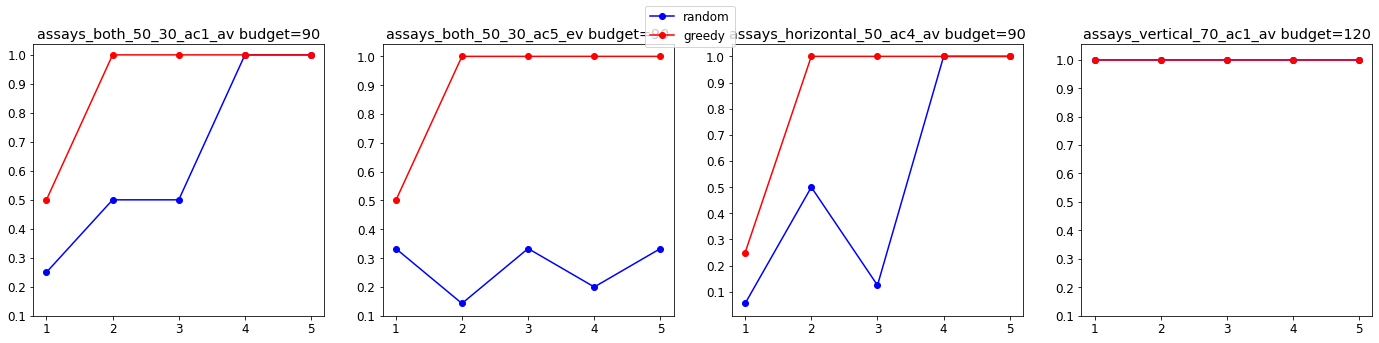

remove ['Climate change mitigation (marker)', 'miller2_Biodiversity(marker)']
remove ['Desertification (marker)', 'miller2_Biodiversity(marker)']
add ['Continent ID', 'miller2_ContinentID']
add ['Regional program (marker)', 'miller2_BilateralAid(internationalMarker)']
add ['CFLI (marker)', 'miller2_BilateralAid(internationalMarker)']
add ['Continent ID', 'miller2_ContinentID']
add ['Regional program (marker)', 'miller2_BilateralAid(internationalMarker)']
add ['CFLI (marker)', 'miller2_BilateralAid(internationalMarker)']
add ['Continent ID', 'miller2_ContinentID']
add ['Regional program (marker)', 'miller2_BilateralAid(internationalMarker)']
add ['CFLI (marker)', 'miller2_BilateralAid(internationalMarker)']
add ['Continent ID', 'miller2_ContinentID']
add ['Regional program (marker)', 'miller2_BilateralAid(internationalMarker)']
add ['CFLI (marker)', 'miller2_BilateralAid(internationalMarker)']
add ['Division name', 'miller2_DivisionName']
add ['Fiscal year', 'miller2_FiscalYear']
add ['

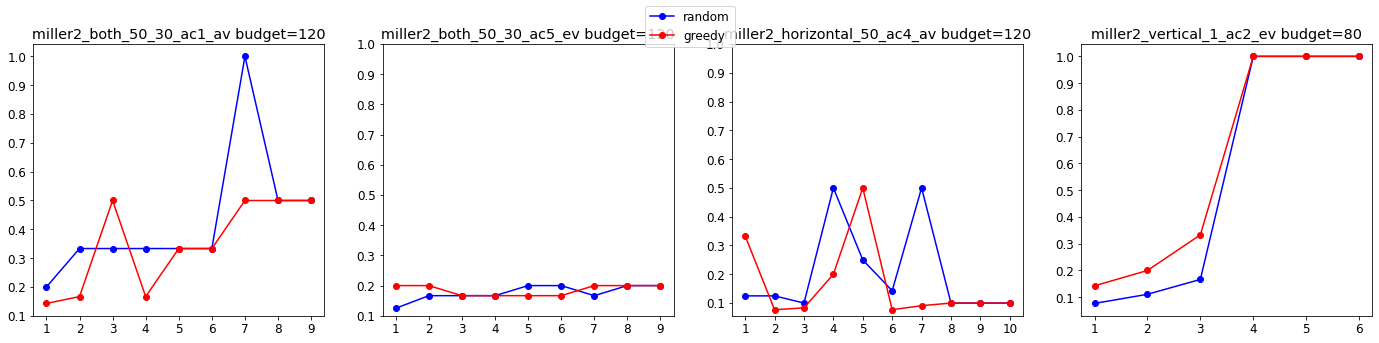

remove ['PostalCode', 'prospect_PostalCode']
remove ['PostalCode', 'prospect_PostalCode']
remove ['AddressLine1', 'prospect_AddressLine1']
remove ['AddressLine2', 'prospect_AddressLine2']
remove ['PostalCode', 'prospect_PostalCode']
remove ['AddressLine1', 'prospect_AddressLine1']
remove ['AddressLine2', 'prospect_AddressLine2']
remove ['PostalCode', 'prospect_PostalCode']
remove ['AddressLine1', 'prospect_AddressLine1']
remove ['AddressLine2', 'prospect_AddressLine2']
remove ['PostalCode', 'prospect_PostalCode']
remove ['AddressLine1', 'prospect_AddressLine1']
remove ['AddressLine2', 'prospect_AddressLine2']
remove ['PostalCode', 'prospect_PostalCode']
remove ['AddressLine1', 'prospect_AddressLine1']
remove ['AddressLine2', 'prospect_AddressLine2']
remove ['NumberCars', 'prospect_nmbrcrs']
remove ['NumberCars', 'prospect_nmbrcrs']
remove ['NumberCars', 'prospect_nmbrcrs']
remove ['NumberCars', 'prospect_nmbrcrs']
remove ['Age', 'prospect_g']
remove ['NumberCars', 'prospect_nmbrcrs']
r

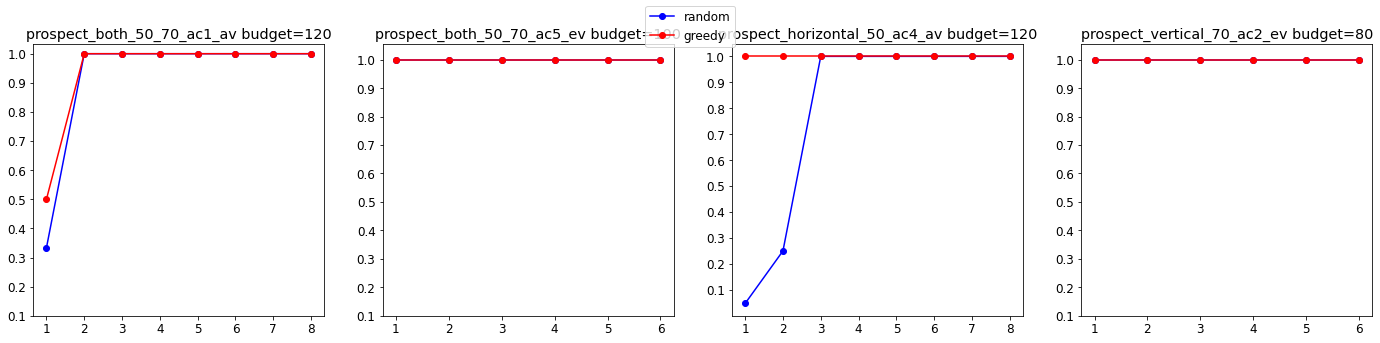

In [26]:
import yaml
with open("/root/autodl-tmp/prompt-matcher-for-schema-matching/configs/config.yaml") as f:
    config = yaml.safe_load(f)
for i in ["musician","assays","miller2","prospect"]:
    mrr_pdf(config, i)

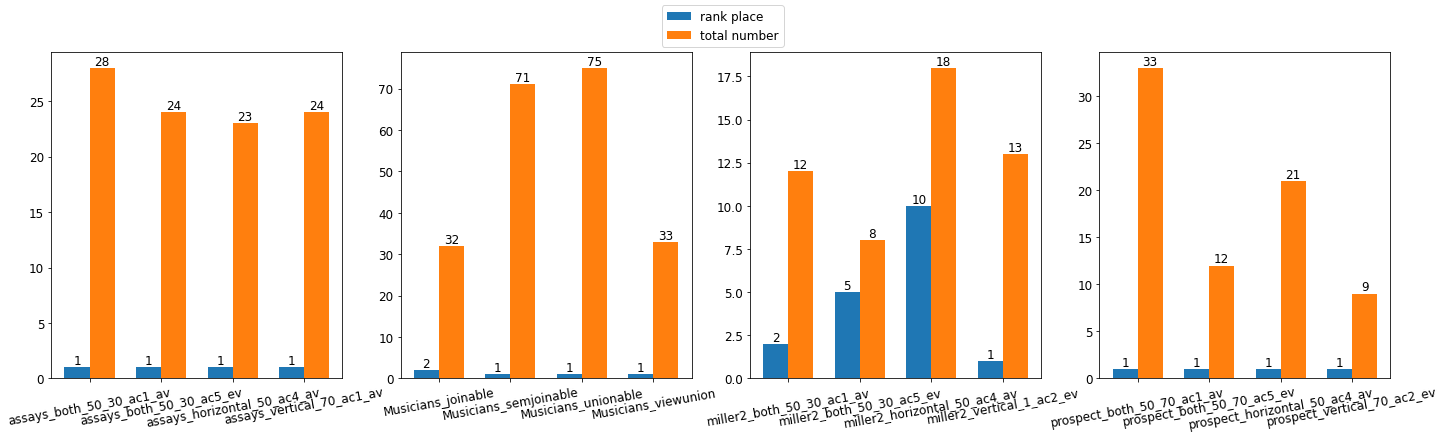

In [52]:
import matplotlib.pyplot as plt 
import numpy as np 
import yaml
import json
plt.rcParams['font.size']=12
mrr_dic = {"musician":[2,1,1,1],"assays":[1,1,1,1],"prospect":[1,1,1,1], "miller2":[2,5,10,1]}
with open("/root/autodl-tmp/prompt-matcher-for-schema-matching/configs/config.yaml") as f:
    config = yaml.safe_load(f)

fig = plt.figure(1, figsize=(24,6))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
ax= [ax1, ax2, ax3, ax4]

for idx, category_name in enumerate(["assays", "musician","miller2","prospect"]):
    names = config[category_name]["names"]
    base_path = config[category_name]["path"]
    mrr_l = mrr_dic[category_name]
    len_l = []
    for dataset_name in names:
        with open(base_path.format(dataset_name), "r") as f:
            content = json.load(f)
            len_l.append(len(content))
    
    categories = names 
    bar_width = 0.35 
    index = np.arange(len(categories)) 
    bar1 = ax[idx].bar(index, mrr_l, bar_width, label='rank place')
    ax[idx].bar_label(bar1, label_type='edge')
    bar2 = ax[idx].bar(index+bar_width, len_l, bar_width, label='total number')
    ax[idx].bar_label(bar2, label_type='edge')
    ax[idx].set_xticks(index+bar_width/2, categories, rotation=10)
lines, labels = ax[-2].get_legend_handles_labels()
fig.legend(lines, labels, loc="upper center")
fig.savefig(f"./result_pdfs/comparative.pdf")
plt.show()